In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:\Windows/Fonts/NanumGothic.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False


## 데이터 불러오기

In [3]:
subway = pd.read_csv('./subway.csv',encoding='cp949')
subway.head(5)

,날짜,호선,역번호,역명,구분,6시이전,6시-7시,7시-8시,8시-9시,9시-10시,...,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후
0,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,...,674,837,796,839,658,579,479,510,445,101
1,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,...,791,781,710,626,437,425,354,307,134,77
2,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,...,189,227,233,347,294,186,216,204,110,29
3,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,...,200,158,140,152,121,57,54,64,23,17
4,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,...,398,513,548,504,572,492,593,513,130,31


## 서울역 승하차 인원 분석

In [4]:
subway['역명'].unique()[:10]

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '동묘앞'], dtype=object)

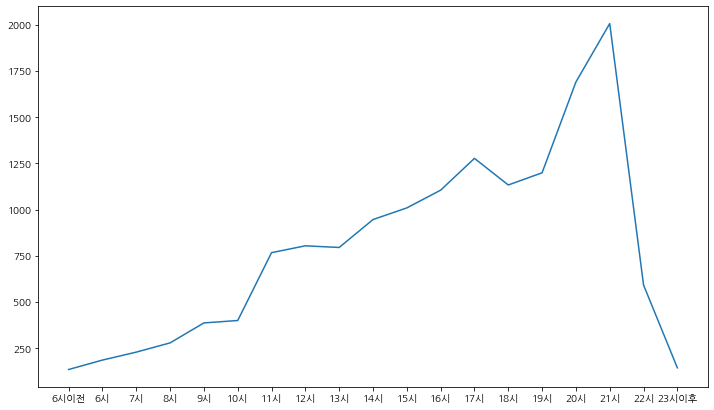

In [50]:
station = subway[subway['역명']=='홍대입구']

plt.figure(figsize=(12,7))
plt.xticks(list(range(19)),[i.split('-')[0] for i in list(station.columns)[5:]])

plt.plot(list(station.iloc[0][5:]))

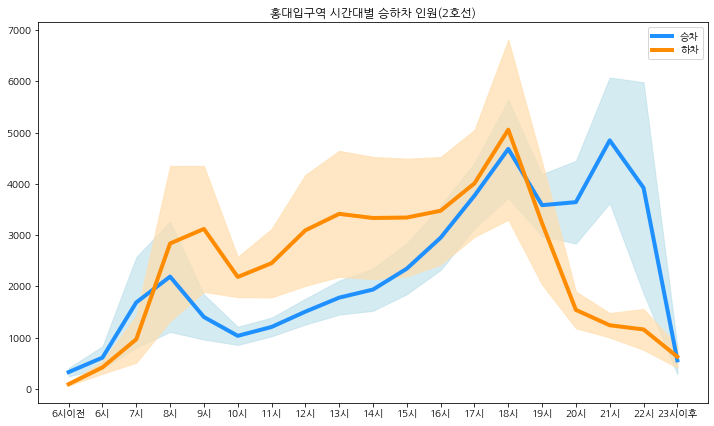

In [51]:
line = '2호선'

seoul_in  = station[(station['구분']=='승차') & (station['호선']==line)]
seoul_out = station[(station['구분']=='하차') & (station['호선']==line)]

mean_in = np.array(seoul_in[list(station.columns)[5:]]).mean(axis=0)
std_in = np.array(seoul_in[list(station.columns)[5:]]).std(axis=0)
mean_out = np.array(seoul_out[list(station.columns)[5:]]).mean(axis=0)
std_out = np.array(seoul_out[list(station.columns)[5:]]).std(axis=0)

#visualization
plt.figure(figsize=(12,7))
plt.xticks(list(range(19)),[i.split('-')[0] for i in list(seoul_in.columns)[5:]])

plt.title('홍대입구역 시간대별 승하차 인원(2호선)')
plt.plot(mean_in, c='dodgerblue', label='승차',linewidth=4)
plt.fill_between(list(range(19)),mean_in-std_in,mean_in+std_in,alpha=0.5,color='lightblue')
plt.plot(mean_out, c='darkorange',label='하차',linewidth=4)
plt.fill_between(list(range(19)), mean_out-std_out, mean_out+std_out, alpha=0.7, color='navajowhite')
plt.legend()
